
**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

#Bagging (Bootstrap Aggregating)

**Definition**: Bagging is an ensemble learning technique used for both classification and regression tasks. It improves the model’s accuracy and stability by combining the predictions of multiple models trained on different subsets of the data.

How It Works:

**Data Sampling:** The dataset is split into multiple subsets (bootstrap samples). Each subset is created by randomly sampling rows from the original dataset with replacement. This means a row can appear in multiple subsets or may not appear at all in some subsets.

**Model Training:** A separate model is trained on each subset of data. These models are often of the same type, such as decision trees.

**Aggregation:**
For classification tasks, predictions from all models are combined, and the final prediction is made based on the majority vote (i.e., the most common class).
For regression tasks, predictions are averaged (mean) or sometimes the median is used for better robustness.

**Key Features:**

It reduces overfitting by introducing diversity among the models.
It increases stability and accuracy compared to a single model.
Adding new data to the dataset has a minimal impact on model performance.

**Example:** Random Forest

Random Forest is a popular implementation of Bagging that uses multiple decision trees.
Each decision tree is trained on a different bootstrap sample and uses a random subset of features at each split to further increase diversity among the trees.
The number of trees in the forest is a hyperparameter that must be tuned to achieve the best results.

**Advantages:**

Reduces variance by averaging predictions across models.
Handles noisy datasets and avoids overfitting.
Works well with both small and large datasets.

**Disadvantage:**

Bagging requires training multiple models, which can increase computational cost and training time.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
iris =load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test=train_test_split(X_iris, y_iris, test_size=0.30, random_state=42)


In [11]:
#find the best hyperparameter
classification_error=[]
n_estimators = range(10, 201, 10)
for i in n_estimators:
  best_para=RandomForestClassifier(n_estimators=i, random_state=42)
  best_para.fit(X_train,y_train)
  predictions=best_para.predict(X_test)
  error=1- accuracy_score(predictions, y_test)
  classification_error.append(error)



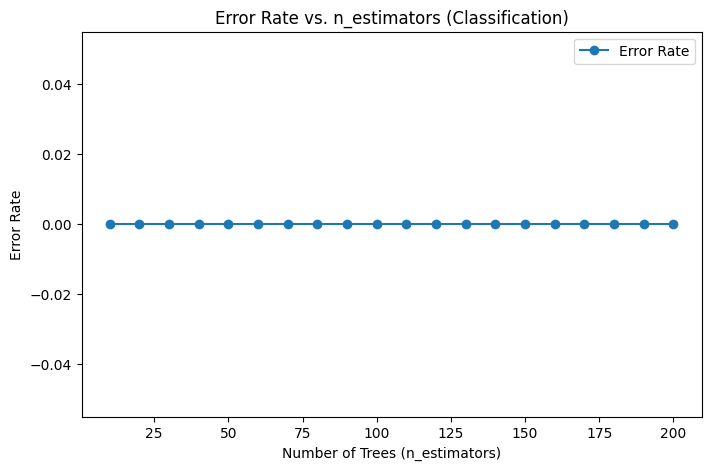

In [13]:
# Plot: Error vs. n_estimators (Classification)
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, classification_error, marker='o', label='Error Rate')
plt.title("Error Rate vs. n_estimators (Classification)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

In [14]:
# Best n_estimators for Classification
optimal_n_cls = n_estimators[np.argmin(classification_error)]
print(f"Optimal n_estimators for Classification: {optimal_n_cls}")

Optimal n_estimators for Classification: 10


In [16]:
#we got best at 10 because from 10 no fluctuations in error rate
# Final Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=optimal_n_cls, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_cls = rf_classifier.predict(X_test)




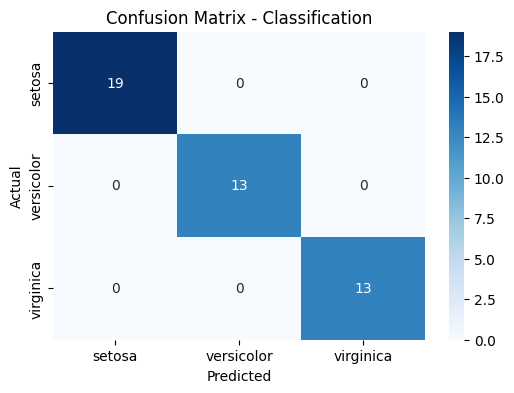

Classification Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
# Metrics for Classification
accuracy = accuracy_score(y_test, y_pred_cls)
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls, target_names=iris.target_names)
# Plot: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Classification Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

In [18]:
# Regression Task: California Housing Dataset
california = fetch_california_housing()
X_california, y_california = california.data, california.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_california, y_california, test_size=0.3, random_state=42
)


In [19]:
# Tuning n_estimators for Regression
regression_errors = []

for n in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = rf_regressor.predict(X_test_reg)
    error = mean_squared_error(y_test_reg, y_pred_reg)
    regression_errors.append(error)


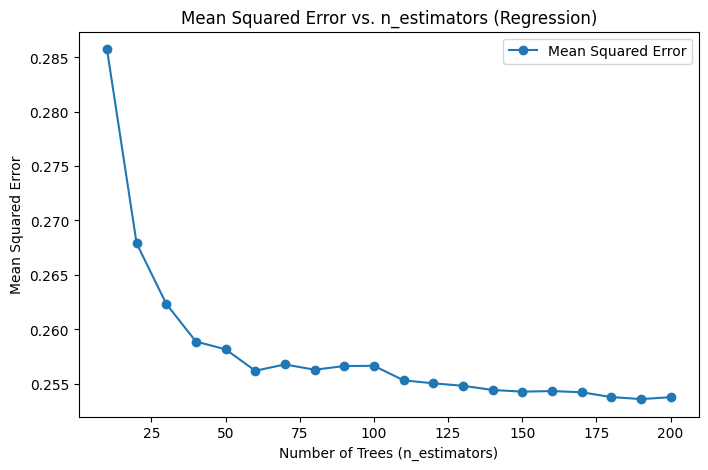

In [20]:
# Plot: Mean Squared Error vs. n_estimators (Regression)
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, regression_errors, marker="o", label="Mean Squared Error")
plt.title("Mean Squared Error vs. n_estimators (Regression)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [21]:
# Best n_estimators for Regression
optimal_n_reg = n_estimators[np.argmin(regression_errors)]
print(f"Optimal n_estimators for Regression: {optimal_n_reg}")



Optimal n_estimators for Regression: 190


In [22]:
# Final Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=optimal_n_reg, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_regressor.predict(X_test_reg)

# Metrics for Regression
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)


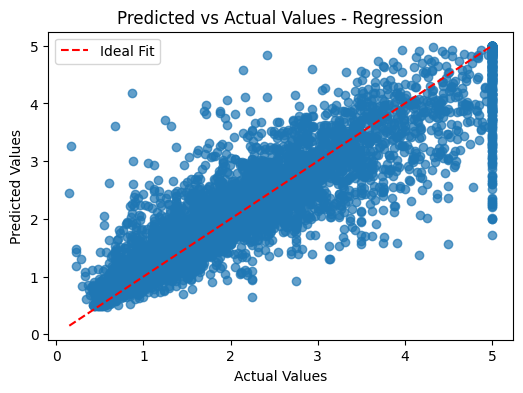

Regression Mean Squared Error: 0.25
Regression R² Score: 0.81


In [23]:
# Plot: Predicted vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.plot(
    [min(y_test_reg), max(y_test_reg)],
    [min(y_test_reg), max(y_test_reg)],
    "--r",
    label="Ideal Fit",
)
plt.title("Predicted vs Actual Values - Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

print(f"Regression Mean Squared Error: {mse:.2f}")
print(f"Regression R² Score: {r2:.2f}")